In [2]:
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Math

/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

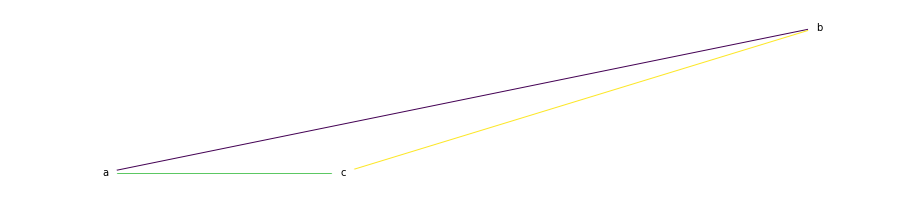

In [3]:
A = np.array([[0,1,1],[0,0,1],[1,0,0]])
G = nx.Graph(A)

labels = {0: "a", 1:"b", 2:"c"}
pos = [(0,0),(3,1),(1,0)]
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, cmap='jet', edge_color=[0.1,0.7,0.9], node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
#nx.draw(G, pos, node_color="white", node_size=500, arrows=False)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

#nx.draw_networkx()

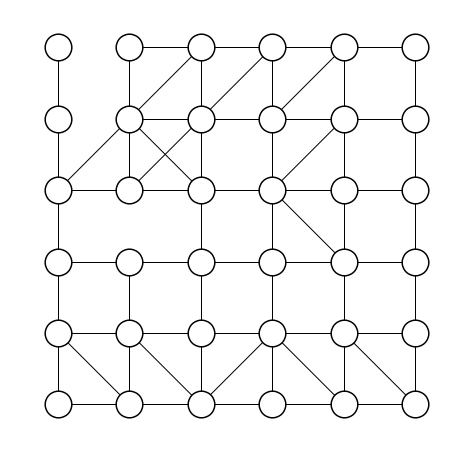

In [5]:
from itertools import product

M = 6;
N = 6
Z = 1.7
NN = M*N

A = np.zeros((NN,NN))
X = np.zeros((NN))
Y = np.zeros((NN))

sig = 0.1;
coords = []
#cols = ("blue","red","yellow","black")
cols = ("black","black")
col = []
for i,j in product(range(N),range(M)):
    ex = np.random.randn(1)*sig
    ey = np.random.randn(1)*sig
    coords.append((j,i))
    X[i*M+j] = i+ex
    Y[i*M+j] = j+ey
    col.append(np.random.choice(cols))
    
    
    
for k,r in product(range(NN),range(NN)):
    if k != r:
        d = (X[k]-X[r])**2 + (Y[k]-Y[r])**2
        A[k,r] = 1 if d < Z else 0

G = nx.Graph(A)

plt.figure(figsize=(M,N))
#nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
nx.draw(G, coords, node_color='black', node_size=200, arrows=False, linewidths=14.)
nx.draw_networkx_nodes(G, coords, node_color='white', node_size=200, arrows=False, linewidths=11., linecolors='black')
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

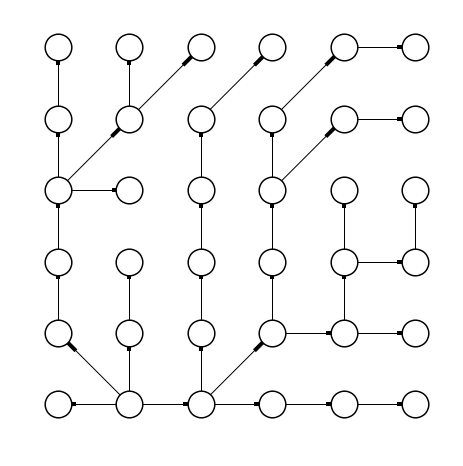

In [6]:
#t = nx.dfs_tree(G,17)
t = nx.bfs_tree(G,1)
#t = nx.prim_mst(G)
plt.figure(figsize=(M,N))
nx.draw(t, coords, node_size=200,node_color="black",linewidths=14.)
nx.draw_networkx_nodes(t, coords, node_color="white", node_size=200,linewidths=11.)

plt.show()



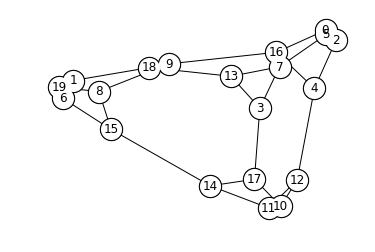

In [7]:
#nx.view_pygraphviz(G)
N = 20
#H = nx.random_graphs.watts_strogatz_graph(N,5,0.1)
H = nx.random_graphs.random_regular_graph(3,N)

lbl = {e:e for e in range(N)}
#nx.view_pygraphviz(H)
nx.draw_networkx_nodes(H,node_color="black",alpha=1, node_size=500, pos=nx.spectral_layout(H))
nx.draw(H,labels=lbl,node_color="white",alpha=1, node_size=400, pos=nx.spectral_layout(H))



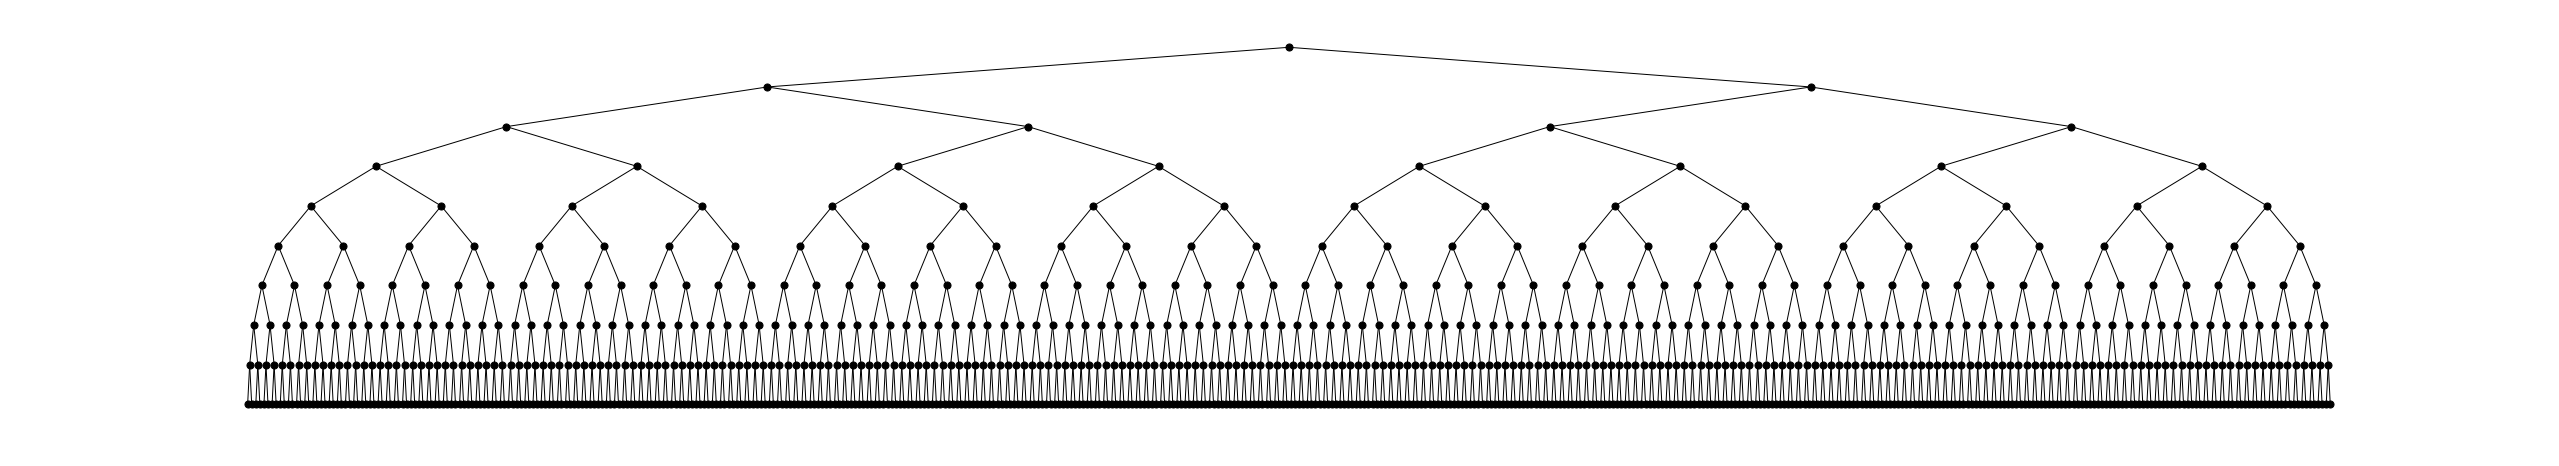

In [10]:
G = nx.Graph()

d = 10
G.add_node(0)
coord = [(0.5,0)]
depth = [0]

for n in range(2,256*4):
    G.add_node(n-1)
    p = int(np.floor(n/2))
    depth.append(depth[p-1]+1)
    if 2*p==n: # left child
        ep = -(1.0/(2**(depth[p-1]+2)))
    else:
        ep = 1.0/(2**(depth[p-1]+2)) 
    coord.append((coord[p-1][0]+ep,-(depth[p-1]+1)))
    G.add_edge(n-1,p-1)

plt.figure(figsize=(35,6))
nx.draw(G, coord, node_size=50, node_color='black')
#nx.draw_shell

[-1  0 49 11 28 26 36 14 29 41 20  1 20 49 48 35 22  0  2 40 36 11 12 13  3
 21 43 16 38  0 45 41 36 36 23  3 28 29 15 18 44 26  4  7 38  5 24 19 18 21]


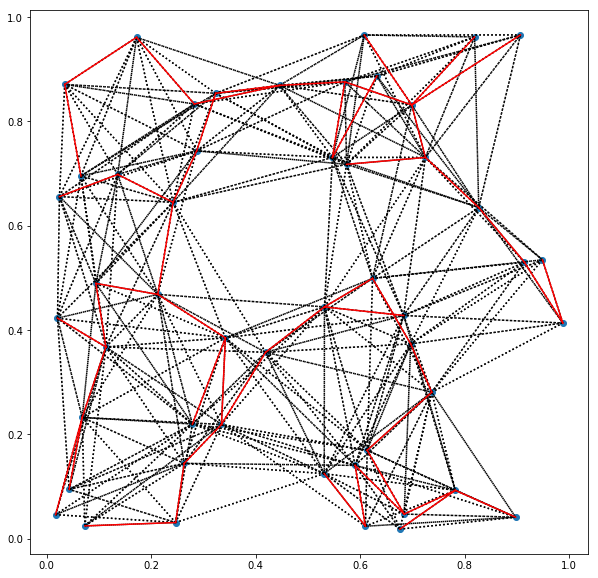

In [7]:
import heapq
import numpy as np

N = 50
thr = 0.35
lb = 0.1
X = np.random.rand(N,2)
D = np.zeros((N,N))

for i,j in product(range(N),range(N)):
    D[i,j] = np.sqrt((X[i,0]-X[j,0])**2 + (X[i,1]-X[j,1])**2)
    if D[i,j]>thr or D[i,j]<lb :
        D[i,j] = np.Inf

visited = np.empty(N,dtype=bool); visited.fill(False)

root = 0
visited[root] = True
numvis = 1;
spt = np.empty(N,dtype=int)
spt.fill(-1)
spt[root] = -1

q = []


for j in range(N):
    if np.isfinite(D[root,j]):
        heapq.heappush(q, (D[root,j], root, j))


while numvis<N:
    if len(q)==0:
        break;
    d,i,j = heapq.heappop(q)
    while len(q)>0 and visited[j]:
        d,i,j = heapq.heappop(q)
        
    spt[j] = i
    visited[j] = True
    numvis+=1
    
    for k in range(N):
        if np.isfinite(D[j,k]) and not visited[k]:
            heapq.heappush(q, (D[j,k], j, k))
    
print(spt)
    
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
for i,j in product(range(N),range(N)):
    if not np.isinf(D[i,j]):
        plt.plot(X[[i,j],0],X[[i,j],1],'k:')
        
for u in range(N):
    if spt[u]!=-1:
        plt.plot(X[[u,spt[u]],0],X[[u,spt[u]],1],'r-')
    


plt.show()


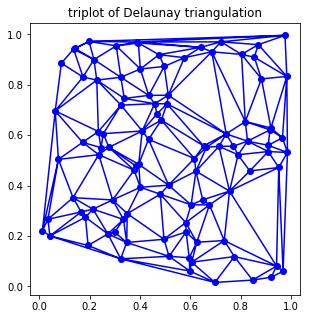

In [3]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

min_radius = 0.1
N = 100

x = np.random.rand(N)
y = np.random.rand(N)

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')
plt.show()

* Traveling Salesman
* Complete Binary tree
* Spanning Tree
* Bipartite Graph
* Shortest Path Tree

In [1]:
import pygraphviz as pgv
from IPython.display import Image
from IPython.display import display

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


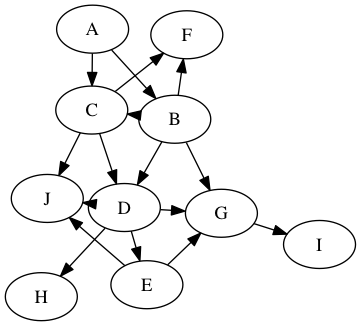

In [9]:
def random_alphabet(N=20, first_letter='A'):
    """Generates unique strings to be used as index_names"""
    if N<27:
        alphabet = [chr(i+ord(first_letter)) for i in range(N)]
    else:
        alphabet = ['X'+str(i) for i in range(N)]    
    return alphabet

def random_parents(alphabet, max_indeg=3):
    """Random DAG generation"""
    N = len(alphabet)
    print(alphabet)
    indeg = lambda: np.random.choice(range(1,max_indeg+1))
    parents = {a:[b for b in np.random.choice(alphabet[0:(1 if i==0 else i)], replace=False, size=min(indeg(),i))] for i,a in enumerate(alphabet)}
    return parents

def show_dag_image(index_names, parents, imstr='_BJN_tempfile.png', prog='dot'):
    name2idx = {name: i for i,name in enumerate(index_names)}
    A = pgv.AGraph(directed=True)
    for i_n in index_names:
        A.add_node(name2idx[i_n], label=i_n)
        for j_n in parents[i_n]:
            A.add_edge(name2idx[j_n], name2idx[i_n])
    A.layout(prog=prog)
    A.draw(imstr)
    display(Image(imstr))
    return 

index_names = random_alphabet(10)
parents = random_parents(index_names, 3)
show_dag_image(index_names, parents, prog='neato')


Road Network

We will build a 2D square grid where neighbors are connected

Remove Random junctions for a more realistic view
Compute a smooth height z by a linear dynamics
Transform x,y,z and print



In [139]:
import numpy as np
import scipy as sc
import pandas as pd

from itertools import product

def ind2idx(i,j, M, N):
    return i + M*j

def idx2ind(k, M, N):
    return k % M, k//M

def neigh(i,j, M, N):    
    ng = {'n': None, 's': None, 'w': None, 'e': None}
    
    # north
    if i>0:
        ng['n'] = ind2idx(i-1,j,M,N)
    # south
    if i<M-1:
        ng['s'] = ind2idx(i+1,j,M,N)
    
    # west
    if j>0:
        ng['w'] = ind2idx(i,j-1,M,N)

    #east
    if j<N-1:
        ng['e'] = ind2idx(i,j+1,M,N)
    
    return ng

# Build a grid of junctions
M, N = 12,15

#ng = neigh(0,0,M,N)
#print(ng)
        
## Build the Adjecency list of the undirected graph
Adj = [[] for i in range(M*N)]


for j in range(N):
    for i in range(M):
        k = ind2idx(i,j,M,N)
        ng = neigh(i,j,M,N)
        
        south = ng['s']  
        if south is not None:
            Adj[k].append(south)
            Adj[south].append(k)
        
        if np.random.rand()<0.8:
            east = ng['e']
            if east is not None:
                Adj[k].append(east)
                Adj[east].append(k)
        
        # print(k,Adj[k])
        
# Kill a fraction of nodes randomly
kill = np.random.choice(range(M*N), size=M*N//10)
for k in kill:
    for u in Adj[k]:
        Adj[u].remove(k)
    Adj[k] = []
    
## Place nodes on a perturbed grid
X = 0.9*np.random.rand(N) + np.arange(0, N)
Y = 0.9*np.random.rand(M) + np.arange(0, M)

Coords = np.zeros((M*N, 3))

for k in range(M*N):
    i, j = idx2ind(k, M, N)
    Coords[k, 0] = X[j]+0.1*np.random.randn()
    Coords[k, 1] = Y[i]+0.1*np.random.randn()
    Coords[k, 2] = np.random.rand()

## Iterate to get a smooth terrain  
EPOCHS = 30

for e in range(EPOCHS):
    perm = np.random.permutation(M*N)
    for k in perm:
        if Adj[k]:
            Coords[k,2] = 0.9*Coords[k,2] + 0.1*np.mean(Coords[Adj[k],2])

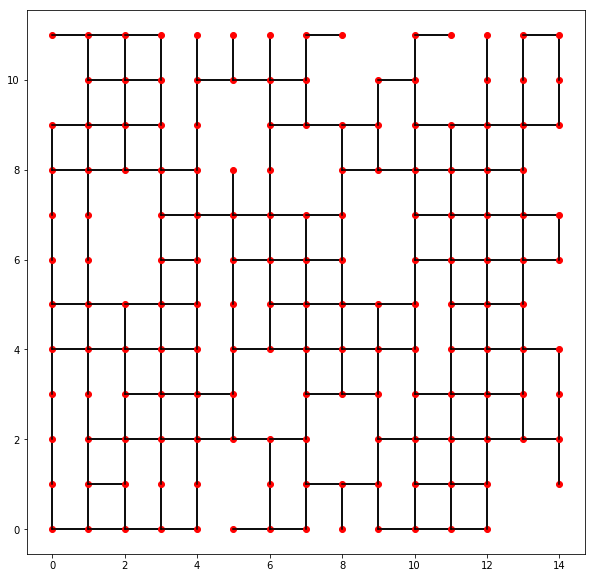

In [136]:
plot_topology(Adj, M, N)

In [140]:

merge = np.random.choice(range(M*N), replace=False, size=30)
for u in merge:
    if Adj[u]:
        v = np.random.choice(Adj[u])
        
        # Disconnect v from u
        Adj[v].remove(u)
        Adj[u].remove(v)
        
        ## transfer all the remaining edges to v
        for w in Adj[u]:
            if w not in Adj[v]:
                Adj[v].append(w)
                Adj[w].append(v)
            Adj[w].remove(u)
                

        Adj[u] = []

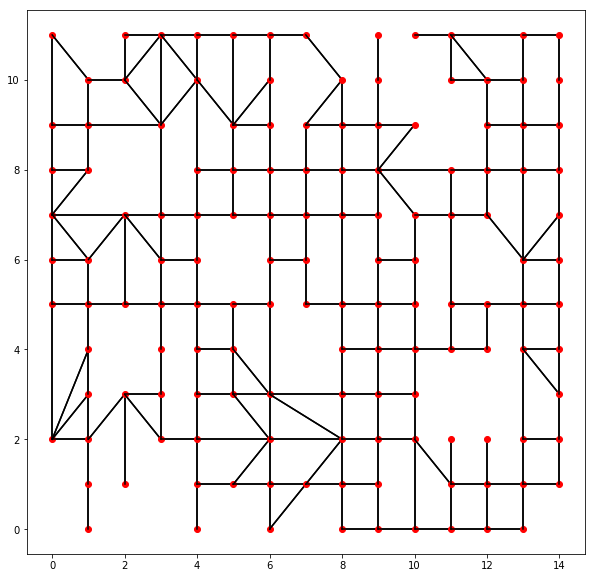

In [141]:
plot_topology(Adj, M, N)

In [96]:
## Print node coordinates
for k in range(M*N):
    print("%2.1f, %2.1f, %2.1f" % (Coords[k, 0], Coords[k, 1], Coords[k, 0]))
    
# Print Edges
for k in range(M*N):
    for u in Adj[k]:
        print('%d,%d' % (k,u))

0.6, 0.1, 0.6
0.5, 1.6, 0.5
0.6, 2.3, 0.6
0.6, 3.1, 0.6
0.8, 4.4, 0.8
0.4, 5.7, 0.4
0.5, 6.1, 0.5
0.5, 7.1, 0.5
0.7, 8.8, 0.7
0.9, 9.8, 0.9
0.5, 10.2, 0.5
0.5, 11.5, 0.5
1.6, -0.1, 1.6
1.6, 1.6, 1.6
1.5, 2.1, 1.5
1.7, 3.3, 1.7
1.4, 4.3, 1.4
1.5, 5.6, 1.5
1.7, 6.1, 1.7
1.7, 6.9, 1.7
1.4, 8.8, 1.4
1.4, 9.7, 1.4
1.6, 10.1, 1.6
1.5, 11.3, 1.5
2.8, -0.0, 2.8
2.7, 1.7, 2.7
2.8, 2.1, 2.8
2.7, 3.2, 2.7
2.6, 4.5, 2.6
2.7, 5.7, 2.7
2.8, 6.4, 2.8
2.7, 7.1, 2.7
2.7, 8.9, 2.7
2.6, 9.7, 2.6
2.6, 10.2, 2.6
2.7, 11.5, 2.7
3.2, -0.1, 3.2
3.1, 1.6, 3.1
3.1, 2.3, 3.1
3.1, 3.3, 3.1
3.2, 4.5, 3.2
3.2, 5.6, 3.2
3.0, 6.4, 3.0
3.2, 7.2, 3.2
3.3, 8.9, 3.3
2.9, 9.7, 2.9
3.1, 10.2, 3.1
3.1, 11.4, 3.1
4.8, 0.2, 4.8
4.5, 1.8, 4.5
4.4, 2.2, 4.4
4.8, 3.2, 4.8
4.8, 4.6, 4.8
4.6, 5.7, 4.6
4.7, 6.3, 4.7
4.7, 7.3, 4.7
4.8, 8.9, 4.8
4.6, 9.8, 4.6
4.7, 10.1, 4.7
4.7, 11.3, 4.7
4.9, 0.1, 4.9
5.1, 1.8, 5.1
5.2, 2.1, 5.2
5.1, 3.3, 5.1
5.0, 4.5, 5.0
5.3, 5.6, 5.3
5.1, 6.3, 5.1
5.1, 7.1, 5.1
5.2, 8.6, 5.2
5.1, 9.6, 5.1
5.2, 10

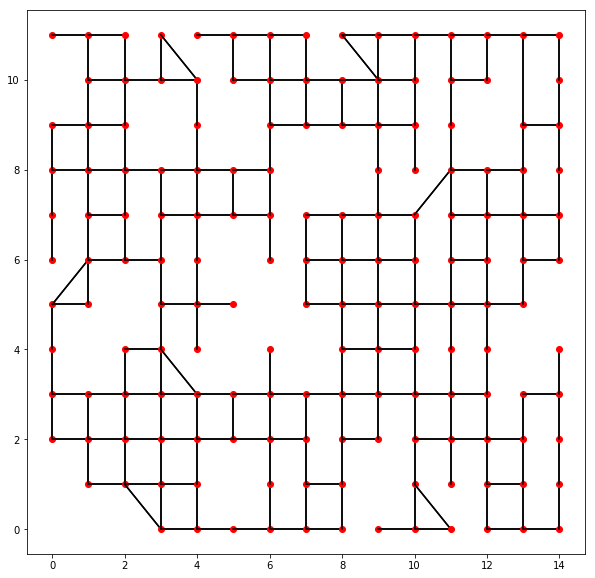

In [112]:
import matplotlib.pylab as plt

def plot_topology(Adj, M, N):
    plt.figure(figsize=(10,10))
    for k,ls in enumerate(Adj):
        i,j = idx2ind(k, M,N)
        for u in ls:
            i_target, j_target = idx2ind(u, M,N)
            plt.plot([j, j_target ],[i, i_target],'k')

        if Adj[k]:
            plt.plot(j, i,'ro')

    plt.show()
    
plot_topology(Adj, M, N)

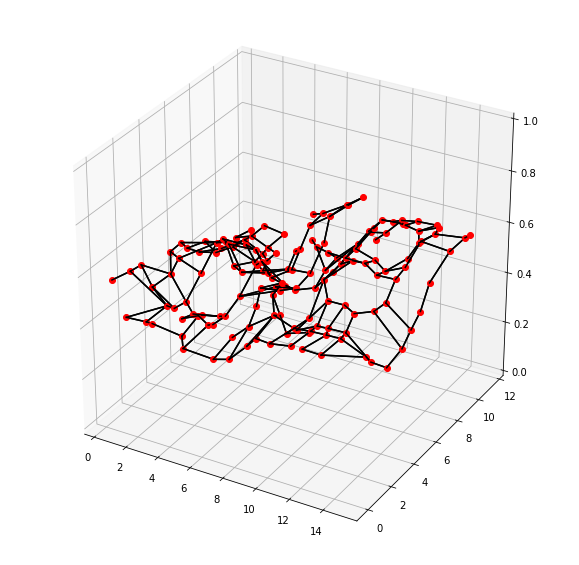

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for k,ls in enumerate(Adj):
    for u in ls:
        ax.plot([Coords[k,0], Coords[u,0] ],[Coords[k,1], Coords[u,1] ], [Coords[k,2], Coords[u,2] ],'k')
      
    if Adj[k]:
        ax.plot([Coords[k,0]], [Coords[k,1]], [Coords[k,2]], 'ro')
    

ax.set_zlim([0, 1])
    
plt.show()


In [69]:
for k in range(M*N):
    print("%2.1f, %2.1f, %2.1f" % (Coords[k, 0], Coords[k, 1], Coords[k, 0]))
    
for k in range(M*N):
    for u in Adj[k]:
        print('%d,%d' % (k,u))

0.8, 0.3, 0.8
0.8, 1.4, 0.8
0.8, 2.6, 0.8
0.8, 3.1, 0.8
0.8, 4.5, 0.8
0.8, 5.4, 0.8
0.7, 6.0, 0.7
0.6, 7.6, 0.6
0.9, 8.2, 0.9
0.8, 9.3, 0.8
1.5, 0.3, 1.5
1.5, 1.5, 1.5
1.6, 2.5, 1.6
1.8, 2.9, 1.8
1.6, 4.6, 1.6
1.7, 5.2, 1.7
1.5, 6.1, 1.5
1.5, 7.5, 1.5
1.7, 8.3, 1.7
1.6, 9.4, 1.6
2.7, 0.1, 2.7
2.7, 1.3, 2.7
2.5, 2.6, 2.5
2.6, 2.8, 2.6
2.6, 4.5, 2.6
2.5, 5.0, 2.5
2.5, 6.1, 2.5
2.6, 7.6, 2.6
2.6, 8.2, 2.6
2.4, 9.1, 2.4
3.7, 0.2, 3.7
3.7, 1.3, 3.7
3.8, 2.7, 3.8
3.9, 2.9, 3.9
3.7, 4.8, 3.7
3.6, 5.4, 3.6
3.7, 6.1, 3.7
3.8, 7.5, 3.8
3.8, 8.2, 3.8
3.7, 9.3, 3.7
4.4, 0.3, 4.4
4.4, 1.4, 4.4
4.3, 2.4, 4.3
4.3, 3.1, 4.3
4.5, 4.6, 4.5
4.6, 5.3, 4.6
4.3, 6.2, 4.3
4.6, 7.5, 4.6
4.4, 8.3, 4.4
4.6, 9.1, 4.6
5.4, 0.5, 5.4
5.4, 1.3, 5.4
5.3, 2.6, 5.3
5.2, 2.9, 5.2
5.3, 4.6, 5.3
5.3, 5.3, 5.3
5.4, 6.2, 5.4
5.3, 7.6, 5.3
5.3, 8.3, 5.3
5.2, 9.4, 5.2
6.3, 0.3, 6.3
6.2, 1.3, 6.2
6.1, 2.6, 6.1
6.2, 3.1, 6.2
6.2, 4.8, 6.2
6.2, 5.6, 6.2
6.3, 6.0, 6.3
6.0, 7.4, 6.0
6.2, 8.4, 6.2
6.2, 9.2, 6.2
7.5, 0.5, 7.5
7.7, 1

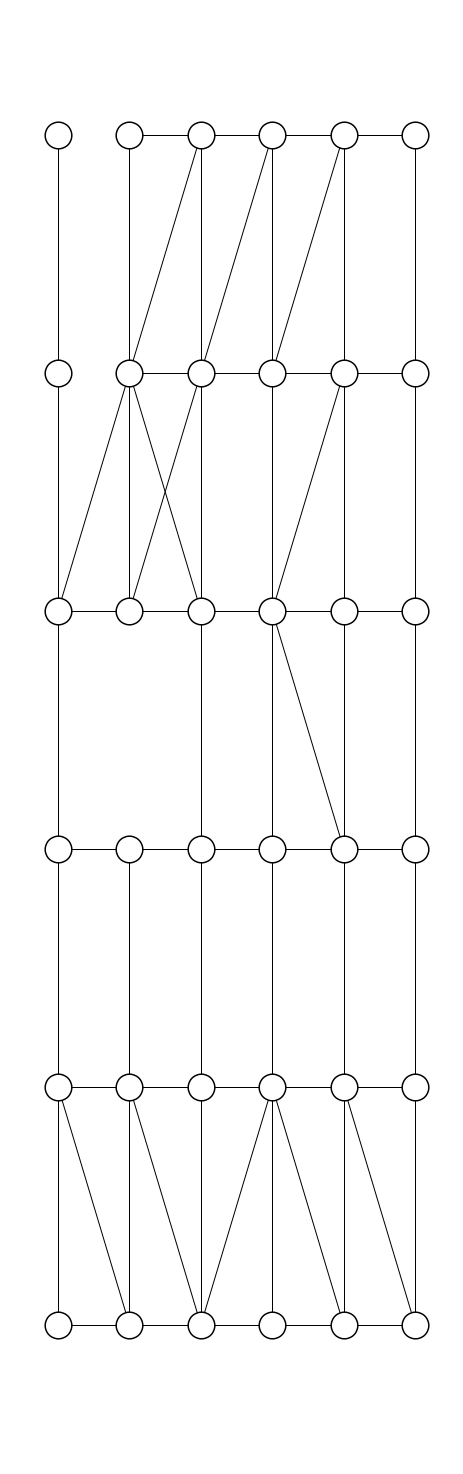

In [11]:
G = nx.Graph(A)

plt.figure(figsize=(M,N))
#nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
nx.draw(G, coords, node_color='black', node_size=200, arrows=False, linewidths=14.)
nx.draw_networkx_nodes(G, coords, node_color='white', node_size=200, arrows=False, linewidths=11., linecolors='black')
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()


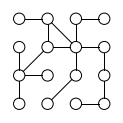

In [7]:
import itertools
import numpy as np
import matplotlib.pylab as plt
import daft

# Instantiate the PGM.
pgm = daft.PGM([3.6, 3.6], origin=[0.7, 0.7], node_unit=0.4, grid_unit=1,
        directed=False)

for i, (xi, yi) in enumerate(itertools.product(range(1, 5), range(1, 5))):
    pgm.add_node(daft.Node(str(i), "", xi, yi))


for e in [(4, 9), (6, 7), (3, 7), (10, 11), (10, 9), (10, 14),
        (10, 6), (10, 7), (1, 2), (1, 5), (1, 0), (1, 6), (8, 12), (12, 13),
        (13, 14), (15, 11)]:
    pgm.add_edge(str(e[0]), str(e[1]))

# Render and save.
pgm.render()
#pgm.figure.savefig("mrf.pdf")
#pgm.figure.savefig("mrf.png", dpi=150)


plt.show(pgm.ax)


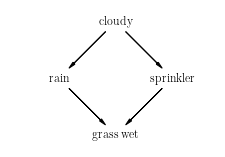

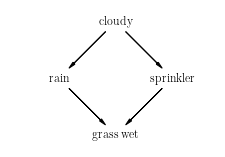

In [9]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

pgm = daft.PGM([3.6, 2.4], origin = [1.15, 0.8], node_ec="none")
pgm.add_node(daft.Node("cloudy", r"cloudy", 3, 3))
pgm.add_node(daft.Node("rain", r"rain", 2, 2))
pgm.add_node(daft.Node("sprinkler", r"sprinkler", 4, 2))
pgm.add_node(daft.Node("wet", r"grass wet", 3, 1))
pgm.add_edge("cloudy", "rain")
pgm.add_edge("cloudy", "sprinkler")
pgm.add_edge("rain", "wet")
pgm.add_edge("sprinkler", "wet")
pgm.render()

plt.show(pgm.ax)

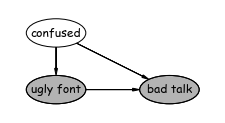

In [11]:
from matplotlib import rc

ff = "comic sans ms"
# ff = "impact"
# ff = "times new roman"

rc("font", family=ff, size=12)
rc("text", usetex=False)

import daft

pgm = daft.PGM([3.6, 1.8], origin=[2.2, 1.6], aspect=2.1)
pgm.add_node(daft.Node("confused", r"confused", 3.0, 3.0))
pgm.add_node(daft.Node("ugly", r"ugly font", 3.0, 2.0, observed=True))
pgm.add_node(daft.Node("bad", r"bad talk", 5.0, 2.0, observed=True))
pgm.add_edge("confused", "ugly")
pgm.add_edge("ugly", "bad")
pgm.add_edge("confused", "bad")
pgm.render()
plt.show(pgm.ax)

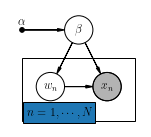

In [12]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

# Instantiate the PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3])

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("beta", r"$\beta$", 1.5, 2))

# Latent variable.
pgm.add_node(daft.Node("w", r"$w_n$", 1, 1))

# Data.
pgm.add_node(daft.Node("x", r"$x_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$",
    shift=-0.1))

# Render and save.
pgm.render()
plt.show(pgm.ax)

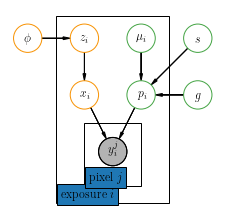

In [13]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

# Colors.
p_color = {"ec": "#46a546"}
s_color = {"ec": "#f89406"}

pgm = daft.PGM([3.6, 3.5], origin=[0.7, 0])

n = daft.Node("phi", r"$\phi$", 1, 3, plot_params=s_color)
n.va = "baseline"
pgm.add_node(n)
pgm.add_node(daft.Node("speckle_coeff", r"$z_i$", 2, 3, plot_params=s_color))
pgm.add_node(daft.Node("speckle_img", r"$x_i$", 2, 2, plot_params=s_color))

pgm.add_node(daft.Node("spec", r"$s$", 4, 3, plot_params=p_color))
pgm.add_node(daft.Node("shape", r"$g$", 4, 2, plot_params=p_color))
pgm.add_node(daft.Node("planet_pos", r"$\mu_i$", 3, 3, plot_params=p_color))
pgm.add_node(daft.Node("planet_img", r"$p_i$", 3, 2, plot_params=p_color))

pgm.add_node(daft.Node("pixels", r"$y_i ^j$", 2.5, 1, observed=True))

# Edges.
pgm.add_edge("phi", "speckle_coeff")
pgm.add_edge("speckle_coeff", "speckle_img")
pgm.add_edge("speckle_img", "pixels")

pgm.add_edge("spec", "planet_img")
pgm.add_edge("shape", "planet_img")
pgm.add_edge("planet_pos", "planet_img")
pgm.add_edge("planet_img", "pixels")

# And a plate.
pgm.add_plate(daft.Plate([1.5, 0.2, 2, 3.2], label=r"exposure $i$",
    shift=-0.1))
pgm.add_plate(daft.Plate([2, 0.5, 1, 1], label=r"pixel $j$",
    shift=-0.1))

# Render and save.
pgm.render()
plt.show(pgm.ax)

In [33]:
%connect_info

{
  "stdin_port": 57484, 
  "ip": "127.0.0.1", 
  "control_port": 57485, 
  "hb_port": 57486, 
  "signature_scheme": "hmac-sha256", 
  "key": "062534bd-ecab-4960-b66c-4bdacfd6b692", 
  "shell_port": 57482, 
  "transport": "tcp", 
  "iopub_port": 57483
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-28aae665-e995-49c2-a35c-c1740b4d8c4f.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
